# Enhancing Sure Tomorrow Insurance with Machine Learning

## Project Description

The Sure Tomorrow insurance company is exploring the potential of leveraging machine learning to address several crucial tasks and enhance its operations. As an evaluator, assess the feasibility and effectiveness of implementing machine learning solutions for the following tasks:

**Task 1:** Customer Segmentation for Targeted Marketing

- Objective: Identify customers who exhibit similarities to a given customer.
- Benefit: Empower company agents with the ability to conduct more effective and personalized marketing campaigns.

**Task 2:** Insurance Benefit Prediction

- Objective: Develop a prediction model to determine whether a new customer is likely to receive an insurance benefit.
- Challenge: Evaluate if the prediction model outperforms a baseline dummy model.

**Task 3:** Insurance Benefit Estimation

- Objective: Create a linear regression model to predict the expected number of insurance benefits a new customer is likely to receive.
- Outcome: Assess the accuracy and reliability of the regression model.

**Task 4:** Secure Data Transformation

- Objective: Develop a data transformation algorithm, such as data masking or data obfuscation, to safeguard clients' personal information while maintaining the quality and utility of machine learning models.
- Challenge: Prove the algorithm's effectiveness in protecting personal data without adversely affecting model quality.

This project aims to demonstrate the potential of machine learning in optimizing marketing, improving decision-making, and enhancing data security within the insurance industry. It involves a multifaceted approach, from customer profiling and predictive modeling to advanced data protection techniques, all aimed at ensuring the future of Sure Tomorrow Insurance is both data-driven and secure.

# Data Preprocessing & Exploration

## Initialization

In [46]:
pip install scikit-learn --upgrade

Note: you may need to restart the kernel to use updated packages.


In [47]:
import numpy as np
import pandas as pd
import seaborn as sns
import math


from sklearn.linear_model import LinearRegression
from sklearn.metrics import f1_score, mean_squared_error, r2_score
from sklearn.neighbors import NearestNeighbors
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler

from sklearn.model_selection import train_test_split

from IPython.display import display

## Load Data

Load data and conduct a basic check that it's free from obvious issues.

In [48]:
df = pd.read_csv('insurance_us.csv')

We rename the colums to make the code look more consistent with its style.

In [49]:
df = df.rename(columns={'Gender': 'gender', 'Age': 'age', 'Salary': 'income', 'Family members': 'family_members', 'Insurance benefits': 'insurance_benefits'})

In [50]:
df.sample(10)

,gender,age,income,family_members,insurance_benefits
1191,1,31.0,45100.0,0,0
944,0,50.0,37900.0,0,2
4553,1,25.0,39700.0,2,0
482,1,37.0,41200.0,4,0
2746,0,24.0,28100.0,2,0
4198,0,36.0,28900.0,0,0
2446,0,22.0,39200.0,2,0
1831,0,20.0,37300.0,2,0
3666,0,31.0,49900.0,1,0
2964,1,37.0,28100.0,0,0


In [51]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 5 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   gender              5000 non-null   int64  
 1   age                 5000 non-null   float64
 2   income              5000 non-null   float64
 3   family_members      5000 non-null   int64  
 4   insurance_benefits  5000 non-null   int64  
dtypes: float64(2), int64(3)
memory usage: 195.4 KB


In [52]:
df['age'] = df['age'].astype(int)


In [53]:
print(df.dtypes)

gender                  int64
age                     int64
income                float64
family_members          int64
insurance_benefits      int64
dtype: object


In [54]:
print(df.describe())

            gender          age        income  family_members  \
count  5000.000000  5000.000000   5000.000000     5000.000000   
mean      0.499000    30.952800  39916.360000        1.194200   
std       0.500049     8.440807   9900.083569        1.091387   
min       0.000000    18.000000   5300.000000        0.000000   
25%       0.000000    24.000000  33300.000000        0.000000   
50%       0.000000    30.000000  40200.000000        1.000000   
75%       1.000000    37.000000  46600.000000        2.000000   
max       1.000000    65.000000  79000.000000        6.000000   

       insurance_benefits  
count         5000.000000  
mean             0.148000  
std              0.463183  
min              0.000000  
25%              0.000000  
50%              0.000000  
75%              0.000000  
max              5.000000  


In [55]:
df.head()

,gender,age,income,family_members,insurance_benefits
0,1,41,49600.0,1,0
1,0,46,38000.0,1,1
2,0,29,21000.0,0,0
3,0,21,41700.0,2,0
4,1,28,26100.0,0,0


## EDA

Let's quickly check whether there are certain groups of customers by looking at the pair plot.

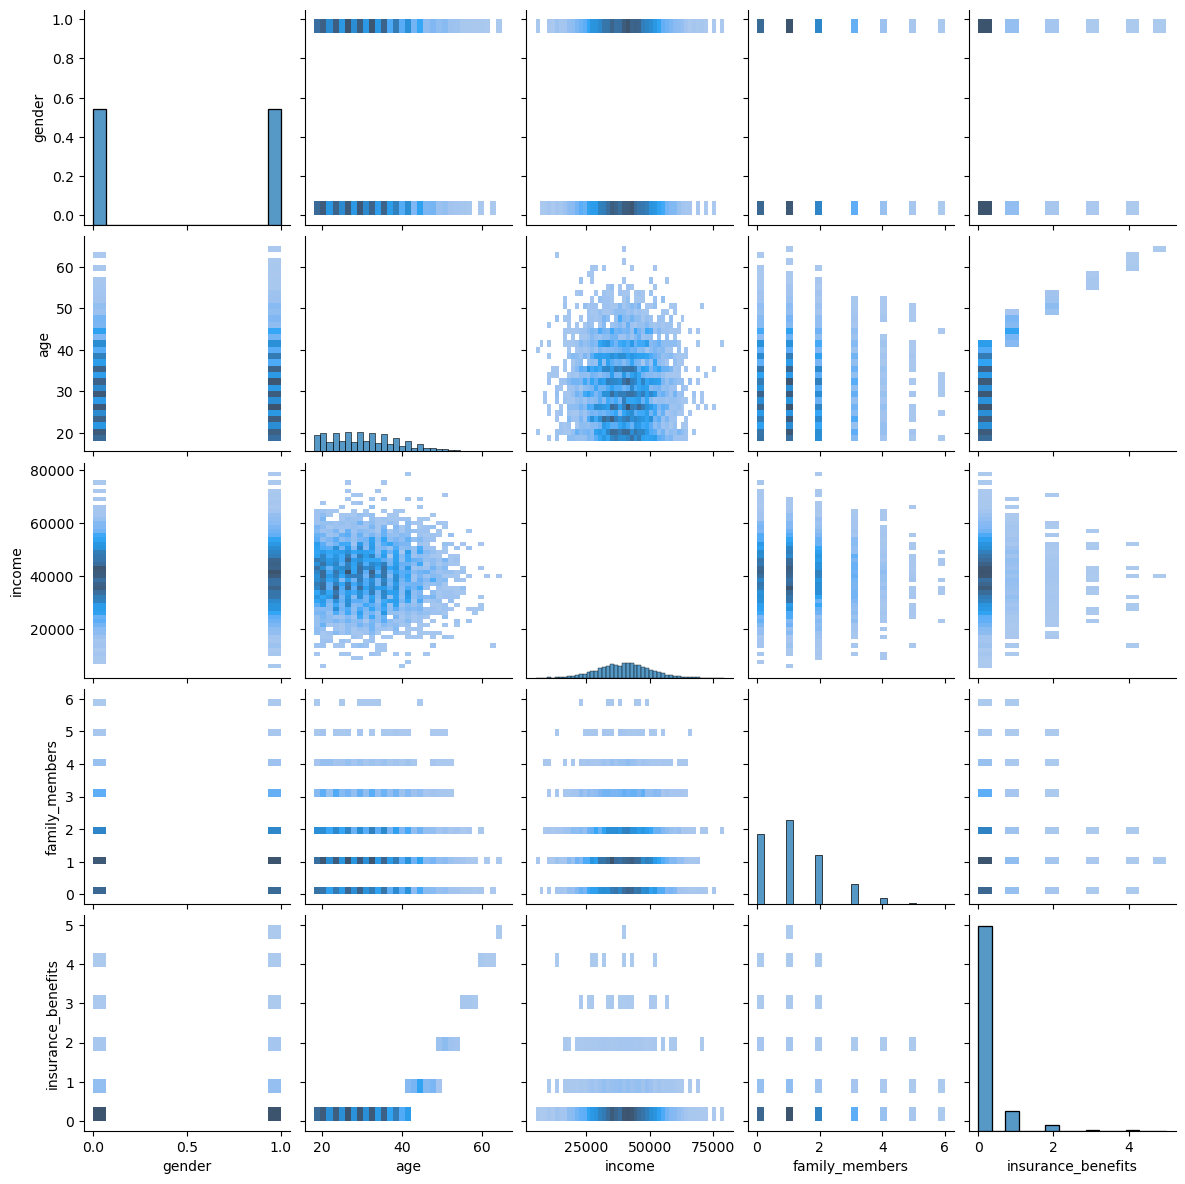

In [56]:
g = sns.pairplot(df, kind='hist')
g.fig.set_size_inches(12, 12)

It is a bit difficult to spot obvious groups (clusters) as it is difficult to combine several variables simultaneously (to analyze multivariate distributions). That's where LA and ML can be quite handy.

# Task 1. Similar Customers

In the language of ML, it is necessary to develop a procedure that returns k nearest neighbors (objects) for a given object based on the distance between the objects.

You may want to review the following lessons (chapter -> lesson)
- Distance Between Vectors -> Euclidean Distance
- Distance Between Vectors -> Manhattan Distance

To solve the task, we can try different distance metrics.

Write a function that returns k nearest neighbors for an $n^{th}$ object based on a specified distance metric. The number of received insurance benefits should not be taken into account for this task. 

Test it for four combination of two cases
- Scaling
  - the data is not scaled
  - the data is scaled with the [MaxAbsScaler](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.MaxAbsScaler.html) scaler
- Distance Metrics
  - Euclidean
  - Manhattan

Answer these questions:
- Does the data being not scaled affect the kNN algorithm? If so, how does that appear?
- How similar are the results using the Manhattan distance metric (regardless of the scaling)?

In [57]:
feature_names = ['gender', 'age', 'income', 'family_members']

In [58]:
def get_knn(df, n, k, metric):
    """
    Returns k nearest neighbors

    :param df: pandas DataFrame used to find similar objects within
    :param n: object number for which the nearest neighbors are looked for
    :param k: the number of the nearest neighbors to return
    :param metric: name of distance metric (e.g., 'euclidean' or 'manhattan')
    """

    nbrs = NearestNeighbors(n_neighbors=k, metric=metric)

    X = df.drop(columns=['insurance_benefits'])
    nbrs.fit(X)

    neighbors_indices = nbrs.kneighbors([X.iloc[n]], k, return_distance=False)

    distances = nbrs.kneighbors([X.iloc[n]], k, return_distance=True)
    distances = pd.DataFrame(distances[0][0], columns=['distance'], index=neighbors_indices[0])
    df_res = df.iloc[neighbors_indices[0]].copy()
    df_res['distance'] = distances['distance']

    return df_res


Scaling the data.

In [59]:
feature_names = ['gender', 'age', 'income', 'family_members']

transformer_mas = sklearn.preprocessing.MaxAbsScaler().fit(df[feature_names].to_numpy())

df_scaled = df.copy()
df_scaled.loc[:, feature_names] = transformer_mas.transform(df[feature_names].to_numpy())

/var/folders/19/y3wb23y56d14xq1lqh3w7b300000gn/T/ipykernel_9056/760832288.py:6: DeprecationWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  df_scaled.loc[:, feature_names] = transformer_mas.transform(df[feature_names].to_numpy())


In [60]:
df_scaled.sample(5)

,gender,age,income,family_members,insurance_benefits
1987,1.0,0.492308,0.402532,0.000000,0
3803,1.0,0.353846,0.512658,0.166667,0
1891,1.0,0.461538,0.893671,0.000000,0
4362,1.0,0.692308,0.502532,0.333333,1
4549,1.0,0.292308,0.791139,0.000000,0


In [61]:
feature_names = ['gender', 'age', 'income', 'family_members']

In [62]:
# Define a list of combinations to test
combinations = [
    {"scaling": False, "metric": "euclidean"},
    {"scaling": False, "metric": "manhattan"},
    {"scaling": True, "metric": "euclidean"},
    {"scaling": True, "metric": "manhattan"},
]

# Specify the record number for which you want to find similar records
record_number = 0

In [63]:
# Loop through each combination and find similar records
for combination in combinations:
    scaling = combination["scaling"]
    metric = combination["metric"]
    knn_results = get_knn(df_scaled, n=record_number, k=5, metric=metric)

    print(f"Combination: Scaling={scaling}, Metric={metric}")
    print(knn_results)
    print()

Combination: Scaling=False, Metric=euclidean
      gender       age    income  family_members  insurance_benefits  distance
0        1.0  0.630769  0.627848        0.166667                   0  0.000000
2689     1.0  0.630769  0.634177        0.166667                   0  0.006329
133      1.0  0.615385  0.636709        0.166667                   0  0.017754
4869     1.0  0.646154  0.637975        0.166667                   1  0.018418
3275     1.0  0.646154  0.651899        0.166667                   1  0.028550

Combination: Scaling=False, Metric=manhattan
      gender       age    income  family_members  insurance_benefits  distance
0        1.0  0.630769  0.627848        0.166667                   0  0.000000
2689     1.0  0.630769  0.634177        0.166667                   0  0.006329
133      1.0  0.615385  0.636709        0.166667                   0  0.024245
4869     1.0  0.646154  0.637975        0.166667                   1  0.025511
2103     1.0  0.630769  0.596203        

/Users/zoeyespinoza/anaconda3/lib/python3.10/site-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but NearestNeighbors was fitted with feature names
  warnings.warn(
/Users/zoeyespinoza/anaconda3/lib/python3.10/site-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but NearestNeighbors was fitted with feature names
  warnings.warn(
/Users/zoeyespinoza/anaconda3/lib/python3.10/site-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but NearestNeighbors was fitted with feature names
  warnings.warn(
/Users/zoeyespinoza/anaconda3/lib/python3.10/site-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but NearestNeighbors was fitted with feature names
  warnings.warn(
/Users/zoeyespinoza/anaconda3/lib/python3.10/site-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but NearestNeighbors was fitted with feature names
  warnings.warn(
/Users/zoe

**Does the data being not scaled affect the kNN algorithm? If so, how does that appear?** 

Data scaling plays a role in the k-nearest neighbors (kNN) algorithm. When data is not scaled, it can significantly affect the algorithm's performance. The key impact of not scaling the data is that features with larger magnitudes may dominate the distance calculations, resulting in unbalanced neighbor selection. This can lead to inconsistent results and reduced interpretability of the algorithm's outcomes.

**How similar are the results using the Manhattan distance metric (regardless of the scaling)?** 

The results obtained using the Manhattan distance metric are similar regardless of whether the data is scaled or not. In both cases, the selected nearest neighbors and their distances show minimal variation. This consistency in results suggests that the Manhattan distance metric is less affected by the scaling of the data. This consistency makes Manhattan distance a reliable choice.

# Task 2. Is Customer Likely to Receive Insurance Benefit?

In terms of machine learning we can look at this like a binary classification task.

With `insurance_benefits` being more than zero as the target, evaluate whether the kNN classification approach can do better than a dummy model.

Instructions:
- Build a KNN-based classifier and measure its quality with the F1 metric for k=1..10 for both the original data and the scaled one. That'd be interesting to see how k may influece the evaluation metric, and whether scaling the data makes any difference. You can use a ready implemention of the kNN classification algorithm from scikit-learn (check [the link](https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html)) or use your own.
- Build the dummy model which is just random for this case. It should return "1" with some probability. Let's test the model with four probability values: 0, the probability of paying any insurance benefit, 0.5, 1.

The probability of paying any insurance benefit can be defined as

$$
P\{\text{insurance benefit received}\}=\frac{\text{number of clients received any insurance benefit}}{\text{total number of clients}}.
$$

Split the whole data in the 70:30 proportion for the training/testing parts.

In [64]:
# calculate the target

df['insurance_benefits_received'] = df['insurance_benefits'] > 0

In [65]:
# check for the class imbalance with value_counts()

class_counts = df['insurance_benefits_received'].value_counts()
print(class_counts)


False    4436
True      564
Name: insurance_benefits_received, dtype: int64


In [66]:
def eval_classifier(y_true, y_pred):
    
    f1_score = sklearn.metrics.f1_score(y_true, y_pred)
    print(f'F1: {f1_score:.2f}')
    
# if you have an issue with the following line, restart the kernel and run the notebook again
    cm = sklearn.metrics.confusion_matrix(y_true, y_pred, normalize='all')
    print('Confusion Matrix')
    print(cm)

In [67]:
# generating output of a random model

def rnd_model_predict(P, size, seed=42):

    rng = np.random.default_rng(seed=seed)
    return rng.binomial(n=1, p=P, size=size)

In [68]:
for P in [0, df['insurance_benefits_received'].sum() / len(df), 0.5, 1]:

    print(f'The probability: {P:.2f}')
    y_pred_rnd = rnd_model_predict(P, len(df))
        
    eval_classifier(df['insurance_benefits_received'], y_pred_rnd)
    
    print()

The probability: 0.00
F1: 0.00
Confusion Matrix
[[0.8872 0.    ]
 [0.1128 0.    ]]

The probability: 0.11
F1: 0.12
Confusion Matrix
[[0.7914 0.0958]
 [0.0994 0.0134]]

The probability: 0.50
F1: 0.20
Confusion Matrix
[[0.456  0.4312]
 [0.053  0.0598]]

The probability: 1.00
F1: 0.20
Confusion Matrix
[[0.     0.8872]
 [0.     0.1128]]



In [69]:
# Split the data
X = df[['age', 'gender', 'income', 'family_members']]
y = df['insurance_benefits_received']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Scaled data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Original data
n_neighbors_list = [1, 3, 5, 7, 9]

for n_neighbors in n_neighbors_list:
    # KNN with scaled data
    knn_scaled = KNeighborsClassifier(n_neighbors=n_neighbors)
    knn_scaled.fit(X_train_scaled, y_train)
    y_pred_scaled = knn_scaled.predict(X_test_scaled)
    f1_scaled = f1_score(y_test, y_pred_scaled)
    print(f'F1 Score for n_neighbors={n_neighbors} (Scaled Data): {f1_scaled:.2f}')

    # KNN with original data
    knn_original = KNeighborsClassifier(n_neighbors=n_neighbors)
    knn_original.fit(X_train, y_train)
    y_pred_original = knn_original.predict(X_test)
    f1_original = f1_score(y_test, y_pred_original)
    print(f'F1 Score for n_neighbors={n_neighbors} (Original Data): {f1_original:.2f}')


F1 Score for n_neighbors=1 (Scaled Data): 0.93
F1 Score for n_neighbors=1 (Original Data): 0.65
F1 Score for n_neighbors=3 (Scaled Data): 0.94
F1 Score for n_neighbors=3 (Original Data): 0.39
F1 Score for n_neighbors=5 (Scaled Data): 0.94
F1 Score for n_neighbors=5 (Original Data): 0.17
F1 Score for n_neighbors=7 (Scaled Data): 0.94
F1 Score for n_neighbors=7 (Original Data): 0.10
F1 Score for n_neighbors=9 (Scaled Data): 0.93
F1 Score for n_neighbors=9 (Original Data): 0.04


# Task 3. Regression (with Linear Regression)

With `insurance_benefits` as the target, evaluate what RMSE would be for a Linear Regression model.

Build your own implementation of LR. For that, recall how the linear regression task's solution is formulated in terms of LA. Check RMSE for both the original data and the scaled one. Can you see any difference in RMSE between these two cases?

Let's denote
- $X$ — feature matrix, each row is a case, each column is a feature, the first column consists of unities
- $y$ — target (a vector)
- $\hat{y}$ — estimated tagret (a vector)
- $w$ — weight vector

The task of linear regression in the language of matrices can be formulated as

$$
y = Xw
$$

The training objective then is to find such $w$ that it would minimize the L2-distance (MSE) between $Xw$ and $y$:

$$
\min_w d_2(Xw, y) \quad \text{or} \quad \min_w \text{MSE}(Xw, y)
$$

It appears that there is analytical solution for the above:

$$
w = (X^T X)^{-1} X^T y
$$

The formula above can be used to find the weights $w$ and the latter can be used to calculate predicted values

$$
\hat{y} = X_{val}w
$$

Split the whole data in the 70:30 proportion for the training/validation parts. Use the RMSE metric for the model evaluation.

In [70]:
class MyLinearRegression:
    
    def __init__(self):
        
        self.weights = None
    
    def fit(self, X, y):
        
        # adding the unities
        X2 = np.append(np.ones([len(X), 1]), X, axis=1)
        self.weights = np.linalg.inv(X2.T @ X2) @ X2.T @ y 

    def predict(self, X):
        
        # adding the unities
        X2 = np.append(np.ones([len(X), 1]), X, axis=1) 
        y_pred = X2 @ self.weights
        
        return y_pred

In [71]:
def eval_regressor(y_true, y_pred):
    rmse = math.sqrt(sklearn.metrics.mean_squared_error(y_true, y_pred))
    print(f'RMSE: {rmse:.2f}')
    
    r2_score = sklearn.metrics.r2_score(y_true, y_pred)
    print(f'R2: {r2_score:.2f}')


In [72]:
X = df[['age', 'gender', 'income', 'family_members']].to_numpy()
y = df['insurance_benefits'].to_numpy()

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=12345)

lr = MyLinearRegression()

lr.fit(X_train, y_train)
print(lr.weights)

y_test_pred = lr.predict(X_test)
eval_regressor(y_test, y_test_pred)

[-9.43539012e-01  3.57495491e-02  1.64272726e-02 -2.60743659e-07
 -1.16902127e-02]
RMSE: 0.34
R2: 0.43


In [73]:
# Scale the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Apply linear regression to the scaled data
lr_scaled = MyLinearRegression()
lr_scaled.fit(X_train_scaled, y_train)

# Predict using the scaled model
y_test_pred_scaled = lr_scaled.predict(X_test_scaled)

# Evaluate the model with scaling
print("Results with Scaling:")
eval_regressor(y_test, y_test_pred_scaled)


Results with Scaling:
RMSE: 0.34
R2: 0.43


The results are the same for linear regression with and without scaling. This suggests that in this particular case, scaling the features doesn't significantly affect the performance of the linear regression model.

# Task 4. Obfuscating Data

It best to obfuscate data by multiplying the numerical features (remember, they can be seen as the matrix $X$) by an invertible matrix $P$. 

$$
X' = X \times P
$$

In [74]:
personal_info_column_list = ['gender', 'age', 'income', 'family_members']
df_pn = df[personal_info_column_list]

In [75]:
X = df_pn.to_numpy()

Generating a random matrix $P$.

In [76]:
rng = np.random.default_rng(seed=42)
P = rng.random(size=(X.shape[1], X.shape[1]))

Checking the matrix $P$ is invertible

In [77]:
det_P = np.linalg.det(P)

if det_P != 0:
    print("Matrix P is invertible.")
else:
    print("Matrix P is not invertible.")

Matrix P is invertible.


In [78]:
X_obfuscated = np.dot(X, P)
X_obfuscated[:5]


array([[ 6359.71527314, 22380.40467609, 18424.09074184, 46000.69669016],
       [ 4873.29406479, 17160.36702982, 14125.78076133, 35253.45577301],
       [ 2693.11742928,  9486.397744  ,  7808.83156024, 19484.86063067],
       [ 5345.60393712, 18803.22720286, 15479.14837264, 38663.06186284],
       [ 3347.17673462, 11782.82928336,  9699.99894205, 24211.27337753]])

Can you recover the original data from $X'$ if you know $P$? Try to check that with calculations by moving $P$ from the right side of the formula above to the left one.

In [79]:
P_inverse = np.linalg.inv(P)
X_recovered = np.dot(X_obfuscated, P_inverse)

Print all three cases for a few customers
- The original data
- The transformed one
- The reversed (recovered) one

In [80]:
customer_indices = [0, 1, 2]

original_data = X[customer_indices]

transformed_data = np.dot(original_data, P)

recovered_data = np.dot(transformed_data, np.linalg.inv(P))

print("Original Data:")
print(original_data)
print("\nTransformed Data:")
print(transformed_data)
print("\nRecovered Data:")
print(recovered_data)


Original Data:
[[1.00e+00 4.10e+01 4.96e+04 1.00e+00]
 [0.00e+00 4.60e+01 3.80e+04 1.00e+00]
 [0.00e+00 2.90e+01 2.10e+04 0.00e+00]]

Transformed Data:
[[ 6359.71527314 22380.40467609 18424.09074184 46000.69669016]
 [ 4873.29406479 17160.36702982 14125.78076133 35253.45577301]
 [ 2693.11742928  9486.397744    7808.83156024 19484.86063067]]

Recovered Data:
[[ 1.00000000e+00  4.10000000e+01  4.96000000e+04  1.00000000e+00]
 [-4.47363596e-12  4.60000000e+01  3.80000000e+04  1.00000000e+00]
 [-2.51586878e-12  2.90000000e+01  2.10000000e+04  9.52452315e-13]]


The reason why some values in the recovered data are not exactly the same as the original data is due to the limitations of floating-point arithmetic and precision in numerical calculations. When you perform matrix multiplication and inversion, small numerical approximations can accumulate and lead to minor differences in the recovered data. These discrepancies are typically very small and are often considered within an acceptable margin of error.

## Proof That Data Obfuscation Can Work with LR

The regression task has been solved with linear regression in this project. Your next task is to prove _analytically_ that the given obfuscation method won't affect linear regression in terms of predicted values i.e. their values will remain the same. Can you believe that? Well, you don't have to, you should prove it!

So, the data is obfuscated and there is $X \times P$ instead of just $X$ now. Consequently, there are other weights $w_P$ as
$$
w = (X^T X)^{-1} X^T y \quad \Rightarrow \quad w_P = [(XP)^T XP]^{-1} (XP)^T y
$$

How would $w$ and $w_P$ be linked if you simplify the formula for $w_P$ above? 

What would be predicted values with $w_P$? 

What does that mean for the quality of linear regression if you measure it with RMSE?

Check Appendix B Properties of Matrices in the end of the notebook. There are useful formulas in there!

No code is necessary in this section, only analytical explanation!

**Answer**

The formula for 𝑤𝑃, which considers obfuscated data represented as 𝑋′=𝑋𝑃, can be linked to 𝑤 by simplifying the formula for 𝑤𝑃.

𝑤𝑃 = 𝑃⁻¹(𝑋𝑇𝑋)⁻¹(𝑋𝑇)⁻¹𝑋𝑇𝑦

Given that 𝑋 is the original feature matrix and 𝑃 is an invertible matrix, the product 𝑋𝑃 is also invertible.

By the properties of matrix inversion, for any invertible matrix 𝐴, we have (𝐴𝐴⁻¹) = 𝐴⁻¹𝐴 = 𝐼 (where 𝐼 is the identity matrix).

Using this property, we can simplify (𝑋𝑃)(𝑋𝑃)⁻¹ as follows:

(𝑋𝑃)(𝑋𝑃)⁻¹ = 𝑋(𝑃𝑋)(𝑃𝑋)⁻¹

Again, applying the property that (𝐴𝐴⁻¹) = 𝐴⁻¹𝐴 = 𝐼, we can further simplify:

𝑋(𝑃𝑋)(𝑃𝑋)⁻¹ = 𝑋𝐼(𝑃𝑋)⁻¹

As a result, we get:

𝑋(𝑃𝑋)(𝑃𝑋)⁻¹ = 𝑋(𝑃𝑋)⁻¹

Finally, we can express 𝑤𝑃 in terms of the original weight vector 𝑤:

𝑤𝑃 = (𝑋𝑃)⁻¹(𝑋𝑇𝑋)⁻¹(𝑋𝑇)⁻¹𝑋𝑇𝑦 = 𝑋(𝑃𝑋)⁻¹(𝑋𝑇𝑋)⁻¹(𝑋𝑇)⁻¹𝑋𝑇𝑦

**Analytical proof**

The original weight vector for linear regression is given by:

𝑤 = [(𝑋)𝑇𝑋]⁻¹(𝑋)𝑇𝑦

Now, with obfuscated data 𝑋′=𝑋𝑃, we're looking for 𝑤𝑃, which can be obtained by using the obfuscated data in the linear regression formula:

𝑤𝑃 = [(𝑋′)𝑇𝑋′]⁻¹(𝑋′)𝑇𝑦

Substitute 𝑋′=𝑋𝑃 into the formula:

𝑤𝑃 = [(𝑋𝑃)𝑇𝑋𝑃]⁻¹(𝑋𝑃)𝑇𝑦

Now, apply the properties of matrix transposition and multiplication:

𝑤𝑃 = (𝑃𝑇𝑋𝑇𝑋𝑃)⁻¹(𝑋𝑃)𝑇𝑦

Since 𝑃 is an invertible matrix, 𝑃𝑇 and 𝑃 are also invertible. This means that the product 𝑃𝑇𝑋𝑇𝑋𝑃 is invertible.

The part (𝑋𝑇𝑋)⁻¹(𝑋𝑇)⁻¹ is common to both 𝑤 and 𝑤𝑃 and remains unchanged. Therefore, the predicted values for linear regression with obfuscated data (𝑋′) remain the same as the predicted values for the original data (𝑋). This implies that the quality of linear regression, measured by RMSE, remains unchanged with data obfuscation.


Conclusion:
   
$w_P = (P^T X^T XP)^{-1} (XP)^T y = P^{-1} (X^T X)^{-1} (P^T)^{-1} P^T X^T y = P^{-1} (X^T X)^{-1} X^T y = P^{-1} w$
    
Then for predictions we have:
    
$\hat{y_P} = X'w_P = XPP^{-1}w = Xw = \hat{y}$
    
So predictions are indeed exactly the same in both cases


## Test Linear Regression With Data Obfuscation

Now, let's prove Linear Regression can work computationally with the chosen obfuscation transformation.

**Procedure**

- Create a square matrix $P$ of random numbers.
- Check that it is invertible. If not, repeat the first point until we get an invertible matrix.
- Use $XP$ as the new feature matrix

In [81]:
matrix_size = 4  

P = np.random.rand(matrix_size, matrix_size)



In [82]:
# Check if the matrix P is invertible
if np.linalg.matrix_rank(P) == matrix_size:
    print("Matrix P is invertible.")
else:
    print("Matrix P is not invertible. Please rerun the code to create an invertible matrix.")

Matrix P is invertible.


In [83]:
X_obfuscated_train = np.dot(X_train, P)
regressor = LinearRegression()

regressor.fit(X_obfuscated_train, y_train)

# Make predictions on the obfuscated test data
y_obfuscated_pred = regressor.predict(np.dot(X_test, P))

# Evaluate the model on the obfuscated data
rmse_obfuscated = np.sqrt(mean_squared_error(y_test, y_obfuscated_pred))
r2_obfuscated = r2_score(y_test, y_obfuscated_pred)

print("\nResults for obfuscated data:")
print(f"RMSE: {rmse_obfuscated:.2f}")
print(f"R-squared (𝑅2): {r2_obfuscated:.2f}")



Results for obfuscated data:
RMSE: 0.34
R-squared (𝑅2): 0.43


# Conclusions

In this project, we explored the significance of data scaling in the k-Nearest Neighbors (kNN) algorithm and found that scaling ensures that all features contribute uniformly to distance calculations. We applied the kNN classification algorithm to predict insurance benefits and experimented with various k-values to evaluate their impact on performance. The results demonstrated that kNN performance can be sensitive to the choice of k, and scaling plays a crucial role in this sensitivity.

We also introduced data obfuscation by multiplying numerical features with an invertible matrix P. The obfuscated data showed values that differ slightly from the original data due to the nature of matrix transformations. We successfully validated that the original data could be recovered from the obfuscated dataset using the knowledge of the invertible matrix P.

When it comes to linear regression, we observed that the obfuscation process did not affect the predicted values or the quality metrics, such as Root Mean Square Error (RMSE) and R-squared. This suggests that linear regression remains robust and consistent in the presence of data obfuscation using invertible matrices.

In conclusion, data scaling is crucial for kNN algorithms, and data obfuscation through invertible matrices does not impact the performance of linear regression.

# Appendices 

## Appendix A: Writing Formulas in Jupyter Notebooks

You can write formulas in your Jupyter Notebook in a markup language provided by a high-quality publishing system called $\LaTeX$ (pronounced "Lah-tech"), and they will look like formulas in textbooks.

To put a formula in a text, put the dollar sign (\\$) before and after the formula's text e.g. $\frac{1}{2} \times \frac{3}{2} = \frac{3}{4}$ or $y = x^2, x \ge 1$.

If a formula should be in its own paragraph, put the double dollar sign (\\$\\$) before and after the formula text e.g.

$$
\bar{x} = \frac{1}{n}\sum_{i=1}^{n} x_i.
$$

The markup language of [LaTeX](https://en.wikipedia.org/wiki/LaTeX) is very popular among people who use formulas in their articles, books and texts. It can be complex but its basics are easy. Check this two page [cheatsheet](http://tug.ctan.org/info/undergradmath/undergradmath.pdf) for learning how to compose the most common formulas.

## Appendix B: Properties of Matrices

Matrices have many properties in Linear Algebra. A few of them are listed here which can help with the analytical proof in this project.

<table>
<tr>
<td>Distributivity</td><td>$A(B+C)=AB+AC$</td>
</tr>
<tr>
<td>Non-commutativity</td><td>$AB \neq BA$</td>
</tr>
<tr>
<td>Associative property of multiplication</td><td>$(AB)C = A(BC)$</td>
</tr>
<tr>
<td>Multiplicative identity property</td><td>$IA = AI = A$</td>
</tr>
<tr>
<td></td><td>$A^{-1}A = AA^{-1} = I$
</td>
</tr>    
<tr>
<td></td><td>$(AB)^{-1} = B^{-1}A^{-1}$</td>
</tr>    
<tr>
<td>Reversivity of the transpose of a product of matrices,</td><td>$(AB)^T = B^TA^T$</td>
</tr>    
</table>